**E-Commerce Shipping Data Predictive Modeling**

**Aulia Fauzani Mukti**<br>
Email : auliafauzani@gmail.com<br>
Phone : +6287823308277<br>
Linkedin : https://linkedin.com/in/auliamukti
<br>

# Import Library & Read Dataset

In [1]:
#Import Library
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as sp
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [2]:
#Visualization plot settings
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [3]:
#read dataset
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


| Variable | Type | Definition | Example |
| ----------- | ----------- | ----------- | ----------- |
| ID | Nominal | Customer ID Number | 10, 15, 10995, 10996
| Warehouse_block | Nominal | Warehouse to Store the Product | A, B, C, D, F
| Mode_of_Shipment | Nominal | Mode of Product Shipping | Flight, Road, Ship
| Customer_care_calls | Discrete | Number of Calls Made | 1, 2, 5, 6
| Customer_rating | Ordinal | Company Rating by Customers | 5: Best - 4: Better - 3: Neutral - 2: Bad - 1: Worst
| Cost_of_the_Product | Discrete | Cost of Product in US Dollars | 177, 216, 236, 182
| Prior_purchases | Discrete | Number of Prior Purchase | 3, 2, 6
| Product_importance | Ordinal | Product Importance Parameter | Low, Medium, High
| Gender | Nominal | Customer Gender | Male, Female
| Discount_offered | Discrete | Product Discount in US Dollars | 65, 10, 16
| Weight_in_gms | Continous | Product Weight in grams | 4953, 5676, 2171
| Reached.on.Time_Y.N | Nominal | Target Variable, 1: NOT reached on time - 0: REACHED on time | 1, 0

In [5]:
df.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
4927,4928,F,Flight,5,5,137,4,low,M,4,5888,0
10201,10202,F,Ship,6,4,271,4,low,F,6,1503,0
10192,10193,C,Ship,6,1,189,2,low,F,6,1269,0
3831,3832,B,Flight,6,1,134,3,medium,M,10,1278,1
3452,3453,A,Ship,5,1,123,2,low,F,9,5497,0
5401,5402,F,Ship,5,3,245,4,high,M,8,4129,1
4027,4028,F,Ship,4,5,249,2,medium,F,10,4562,0
7145,7146,F,Ship,5,4,243,5,low,F,2,1637,0
6662,6663,A,Ship,4,1,200,4,medium,M,3,5837,0
602,603,A,Ship,4,3,206,3,medium,M,58,2135,1


In [6]:
#Change Column name
df.rename(columns={'ID' : 'ID', 'Warehouse_block' : 'Warehouse', 'Mode_of_Shipment' : 'Shipment', 
                   'Customer_care_calls' : 'Calls', 'Customer_rating' : 'Rating', 'Cost_of_the_Product' : 'Cost', 
                   'Prior_purchases' : 'Purchase', 'Product_importance' : 'Importance', 'Gender' : 'Gender', 
                   'Discount_offered' : 'Discount', 'Weight_in_gms' : 'Weight', 'Reached.on.Time_Y.N' : 'Late'}, inplace = True)

In [7]:
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Numerical Approach

In [8]:
#Changing data type for describe data
df = df.astype({'ID' : object, 'Rating' : object, 'Late' : object})

In [9]:
#Separate columns by data type to make it easier to describe data
cats = ['ID', 'Warehouse', 'Shipment', 'Rating', 'Importance', 'Gender', 'Late']
nums = ['Calls', 'Cost', 'Purchase', 'Discount', 'Weight', ]

In [10]:
df[cats].describe()

,ID,Warehouse,Shipment,Rating,Importance,Gender,Late
count,10999,10999,10999,10999,10999,10999,10999
unique,10999,5,3,5,3,2,2
top,1,F,Ship,3,low,F,1
freq,1,3666,7462,2239,5297,5545,6563


In [11]:
df[nums].describe()

,Calls,Cost,Purchase,Discount,Weight
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,210.196836,3.567597,13.373216,3634.016729
std,1.141490,48.063272,1.522860,16.205527,1635.377251
min,2.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,310.000000,10.000000,65.000000,7846.000000


In [12]:
df['Late'].value_counts()

1    6563
0    4436
Name: Late, dtype: int64

In [13]:
df = df.astype({'ID' : 'int64', 'Rating' : 'int64', 'Late' : 'int64'})

In [14]:
#Separate columns by data type for visualization process
cats = ['Warehouse', 'Shipment', 'Importance', 'Gender']
nums = ['Calls', 'Rating', 'Cost', 'Purchase', 'Discount', 'Weight', 'Late']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


## Graphic Approach

### Univariate Analysis

#### Boxplot

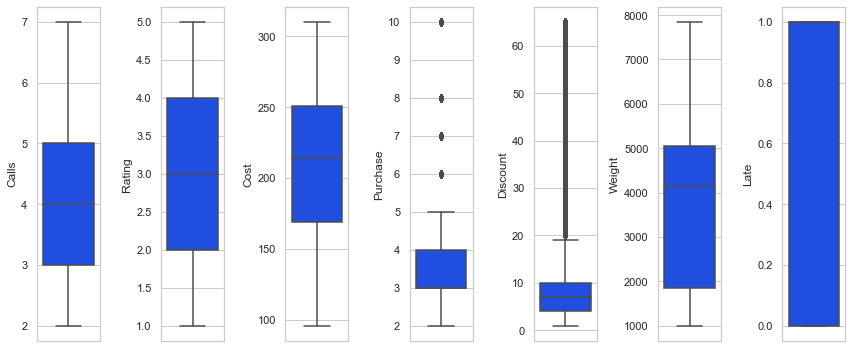

In [16]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

#### Distplot

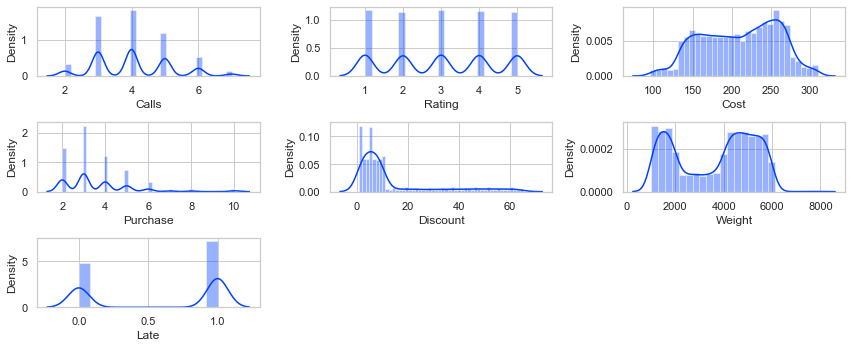

In [17]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

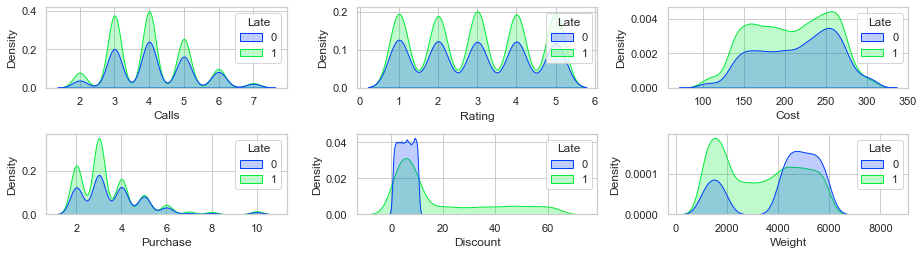

In [18]:
#see data distribution by target
numsplot = ['Calls','Rating', 'Cost','Purchase', 'Discount', 'Weight']
plt.figure(figsize=(13, 5))
for i in range(0, len(numsplot)):
    plt.subplot(3, len(numsplot)/2, i+1)
    sns.kdeplot(data=df, x=df[numsplot[i]], hue='Late', fill='True')
    plt.tight_layout()

#### Violinplot

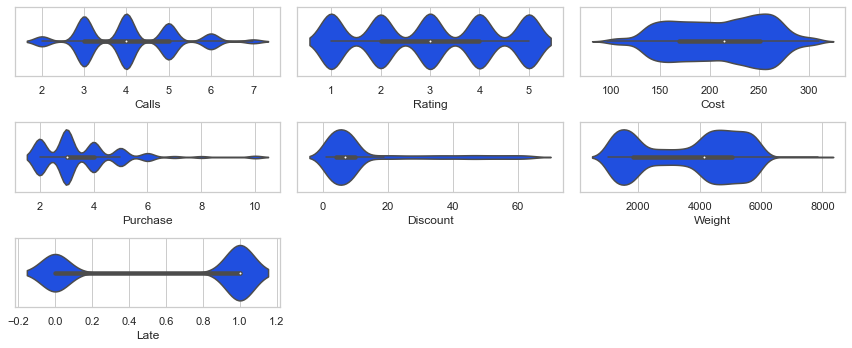

In [19]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.violinplot(df[nums[i]])
    plt.tight_layout()

#### Countplot

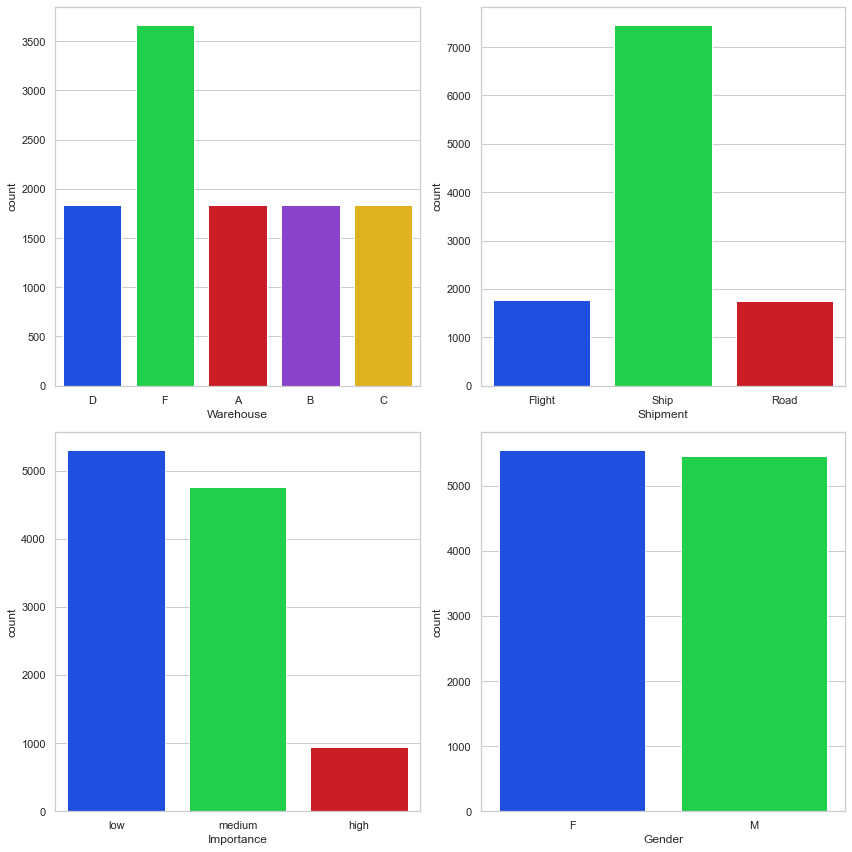

In [20]:
plt.figure(figsize=(12, 12))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(df[cats[i]], orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='Late', ylabel='count'>

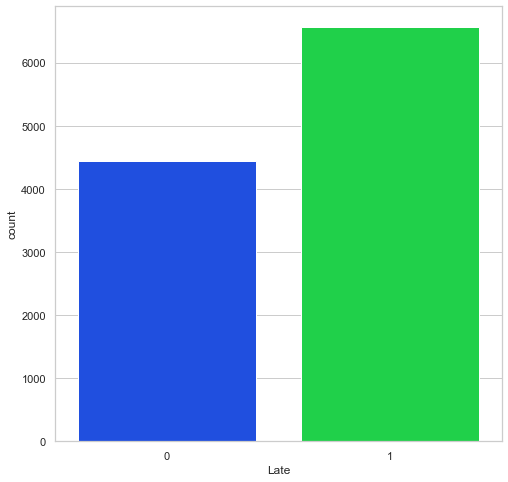

In [21]:
plt.figure(figsize=(8, 8))
sns.countplot(x=df['Late'], data=df)

### Multivariate Analysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


#### Histplot

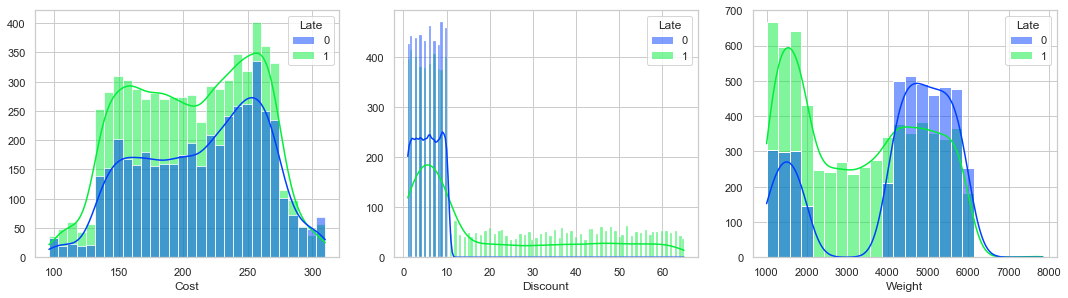

In [23]:
flag2 = ['Cost', 'Discount', 'Weight']

plt.figure(figsize=(15, 12))
for i in range(0, len(flag2)):
    plt.subplot(len(flag2), 3, i+1)
    sns.histplot(data=df, x=df[flag2[i]], hue=df['Late'], fill=True, kde='True')
    plt.tight_layout()
    plt.ylabel(None)

1. Based on the Price histogram, the information obtained is that late deliveries increase when the price approaches the value of 130 and decreases when the price approaches 275

2. Based on the Discount histogram, the information obtained is that more on-time deliveries when the discount is below 10, and when the discount is above 10, the delivery must be late

3. Based on the weight histogram, the information obtained is:<br>
    a. More late deliveries when the weight is under 2kg<br>
    b. delivery must be late when the weight is 2 kg to 4 kg<br>
    c. More delivery on time when the weight is 4kg to 6kg 


#### Boxplot

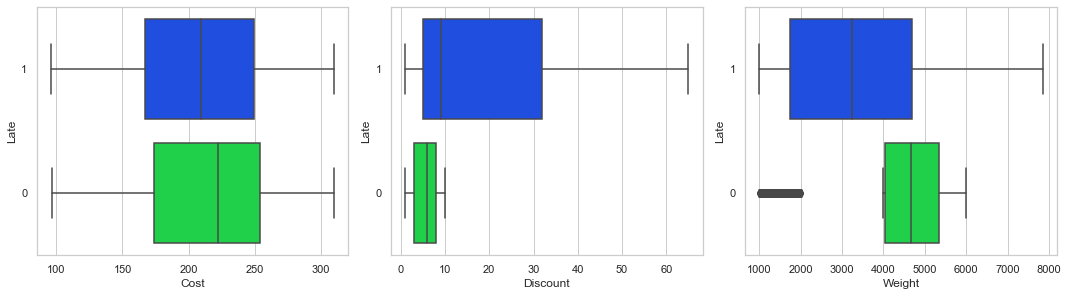

In [24]:
plt.figure(figsize=(15, 12))
for i in range(0, len(flag2)):
    plt.subplot(len(flag2), 3, i+1)
    sns.boxplot(data=df, x=df[flag2[i]], y=df['Late'].astype(str))
    plt.tight_layout()

#### Barplot

In [25]:
df_ship = df.groupby(['Shipment', 'Late']).agg({'ID' : 'count' }).reset_index()
df_ship.columns = ['Shipment', 'Late', 'Count']
df_ship['Total'] = df_ship.groupby(['Shipment'])['Count'].transform('sum')
df_ship['Percentage'] = round(df_ship['Count'] / df_ship['Total'] * 100, 2)
df_ship

,Shipment,Late,Count,Total,Percentage
0,Flight,0,708,1777,39.84
1,Flight,1,1069,1777,60.16
2,Road,0,725,1760,41.19
3,Road,1,1035,1760,58.81
4,Ship,0,3003,7462,40.24
5,Ship,1,4459,7462,59.76


<AxesSubplot:xlabel='Shipment', ylabel='Percentage'>

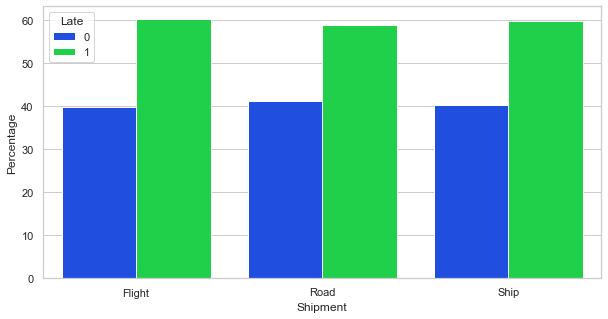

In [26]:
sns.barplot(x = 'Shipment', y = 'Percentage' , data = df_ship, hue = 'Late')

<AxesSubplot:xlabel='Shipment', ylabel='count'>

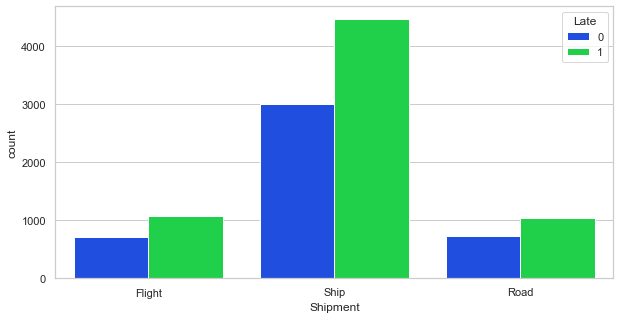

In [27]:
sns.countplot(x = 'Shipment', data = df, hue = 'Late')

In [28]:
df_warehouse = df.groupby(['Warehouse', 'Late']).agg({'ID' : 'count' }).reset_index()
df_warehouse.columns = ['Warehouse', 'Late', 'Count']
df_warehouse['Total'] = df_warehouse.groupby(['Warehouse'])['Count'].transform('sum')
df_warehouse['Percentage'] = round(df_warehouse['Count'] / df_warehouse['Total'] * 100, 2)
df_warehouse

,Warehouse,Late,Count,Total,Percentage
0,A,0,758,1833,41.35
1,A,1,1075,1833,58.65
2,B,0,729,1833,39.77
3,B,1,1104,1833,60.23
4,C,0,739,1833,40.32
5,C,1,1094,1833,59.68
6,D,0,738,1834,40.24
7,D,1,1096,1834,59.76
8,F,0,1472,3666,40.15
9,F,1,2194,3666,59.85


<AxesSubplot:xlabel='Warehouse', ylabel='Percentage'>

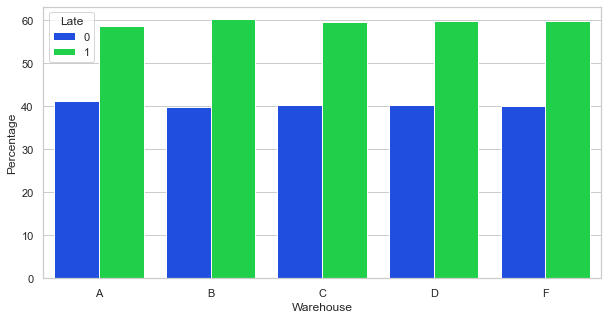

In [29]:
sns.barplot(x = 'Warehouse', y = 'Percentage' , data = df_warehouse, hue = 'Late')

<AxesSubplot:xlabel='Warehouse', ylabel='count'>

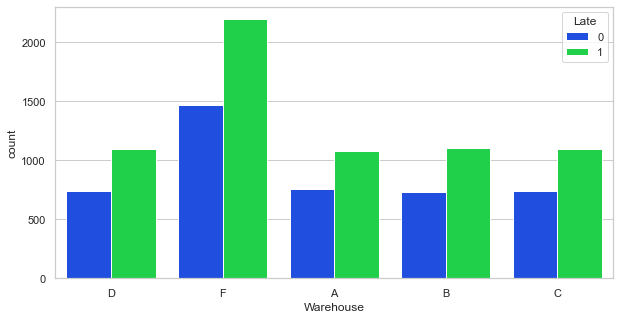

In [30]:
sns.countplot(x = 'Warehouse', data = df, hue = 'Late')

In [31]:
df_calls = df.groupby(['Calls', 'Late']).agg({'ID' : 'count' }).reset_index()
df_calls.columns = ['Calls', 'Late', 'Count']
df_calls['Total'] = df_calls.groupby(['Calls'])['Count'].transform('sum')
df_calls['Percentage'] = round(df_calls['Count'] / df_calls['Total'] * 100, 2)
df_calls

,Calls,Late,Count,Total,Percentage
0,2,0,222,638,34.80
1,2,1,416,638,65.20
2,3,0,1206,3217,37.49
3,3,1,2011,3217,62.51
4,4,0,1431,3557,40.23
5,4,1,2126,3557,59.77
6,5,0,968,2328,41.58
7,5,1,1360,2328,58.42
8,6,0,490,1013,48.37
9,6,1,523,1013,51.63


<AxesSubplot:xlabel='Calls', ylabel='Percentage'>

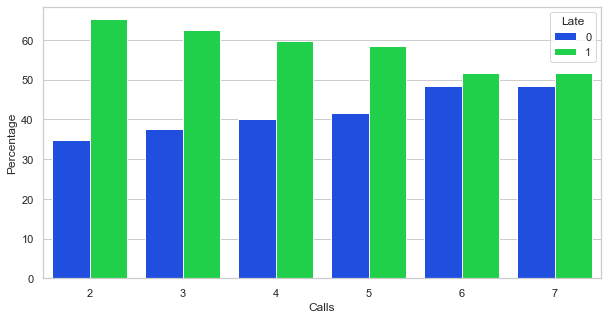

In [32]:
sns.barplot(x = 'Calls', y = 'Percentage' , data = df_calls, hue = 'Late')

<AxesSubplot:xlabel='Calls', ylabel='count'>

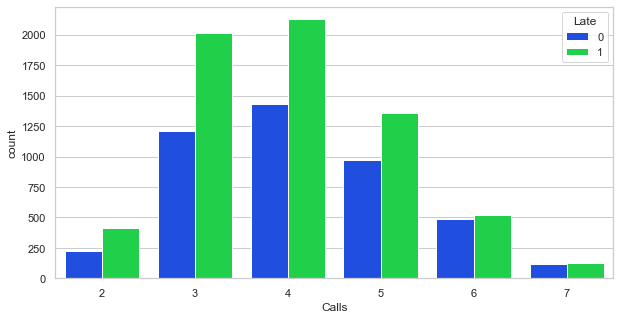

In [33]:
sns.countplot(x = 'Calls', data = df, hue = 'Late')

In [34]:
df_importance = df.groupby(['Importance', 'Late']).agg({'ID' : 'count' }).reset_index()
df_importance.columns = ['Importance', 'Late', 'Count']
df_importance['Total'] = df_importance.groupby(['Importance'])['Count'].transform('sum')
df_importance['Percentage'] = round(df_importance['Count'] / df_importance['Total'] * 100, 2)
df_importance

,Importance,Late,Count,Total,Percentage
0,high,0,332,948,35.02
1,high,1,616,948,64.98
2,low,0,2157,5297,40.72
3,low,1,3140,5297,59.28
4,medium,0,1947,4754,40.95
5,medium,1,2807,4754,59.05


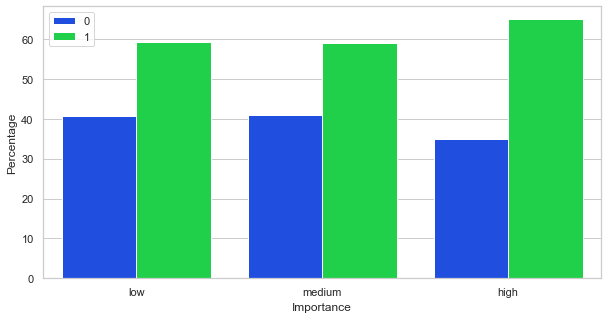

In [35]:
sns.barplot(x = 'Importance', y = 'Percentage' , data = df_importance, hue = 'Late', 
           order = ['low', 'medium', 'high'])
plt.legend(loc= 'upper left')

<AxesSubplot:xlabel='Importance', ylabel='count'>

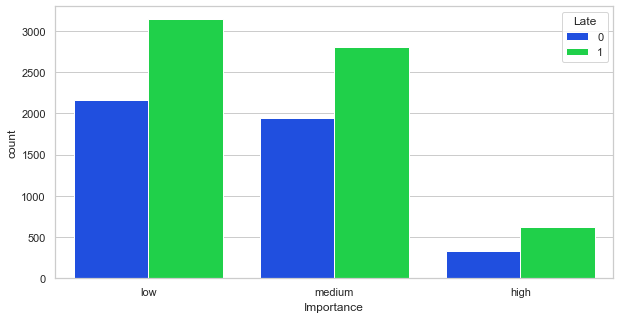

In [36]:
sns.countplot(x = 'Importance', data = df, hue = 'Late')

<AxesSubplot:xlabel='Discount', ylabel='count'>

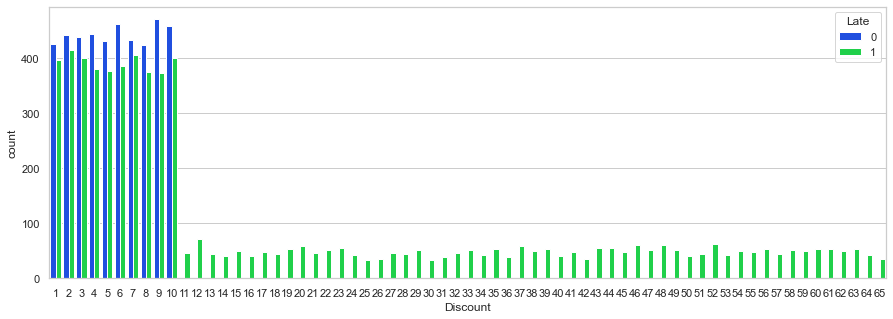

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Discount', data = df, hue = 'Late')

In [38]:
df_purchase = df.groupby(['Purchase', 'Late']).agg({'ID' : 'count' }).reset_index()
df_purchase.columns = ['Purchase', 'Late', 'Count']
df_purchase['Total'] = df_purchase.groupby(['Purchase'])['Count'].transform('sum')
df_purchase['Percentage'] = round(df_purchase['Count'] / df_purchase['Total'] * 100, 2)
df_purchase

,Purchase,Late,Count,Total,Percentage
0,2,0,974,2599,37.48
1,2,1,1625,2599,62.52
2,3,0,1421,3955,35.93
3,3,1,2534,3955,64.07
4,4,0,984,2155,45.66
5,4,1,1171,2155,54.34
6,5,0,645,1287,50.12
7,5,1,642,1287,49.88
8,6,0,247,561,44.03
9,6,1,314,561,55.97


<AxesSubplot:xlabel='Purchase', ylabel='Percentage'>

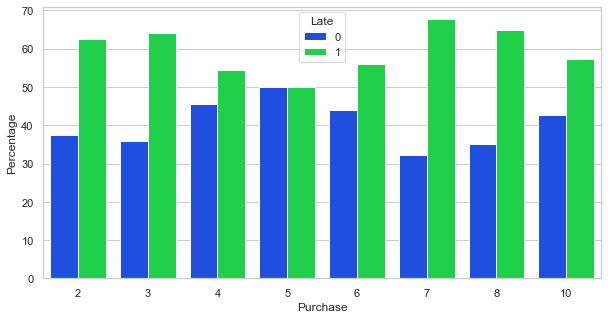

In [39]:
sns.barplot(x = 'Purchase', y = 'Percentage' , data = df_purchase, hue = 'Late')

<AxesSubplot:xlabel='Purchase', ylabel='count'>

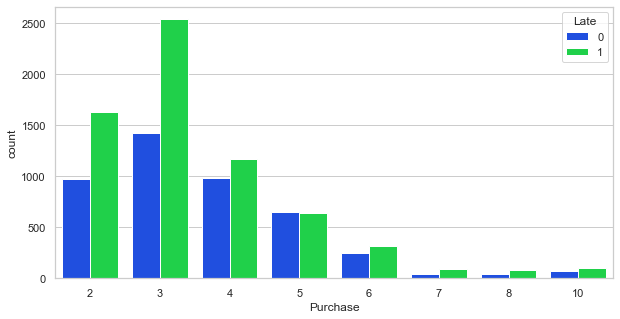

In [40]:
sns.countplot(x = 'Purchase', data = df, hue = 'Late')

#### Heatmap

<AxesSubplot:>

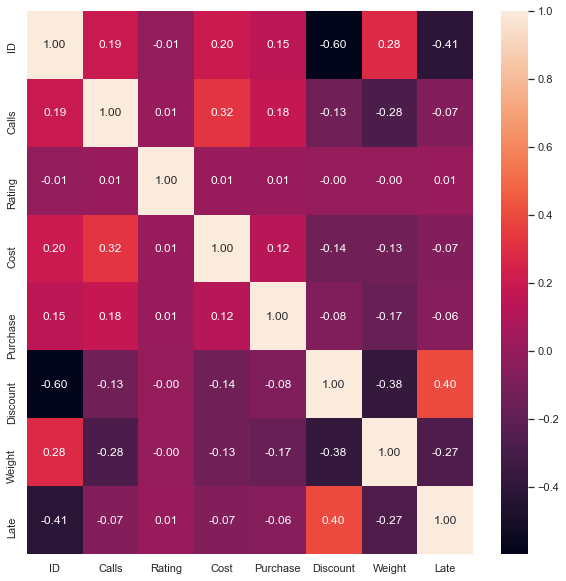

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

#### Pairplot

<Figure size 720x720 with 0 Axes>

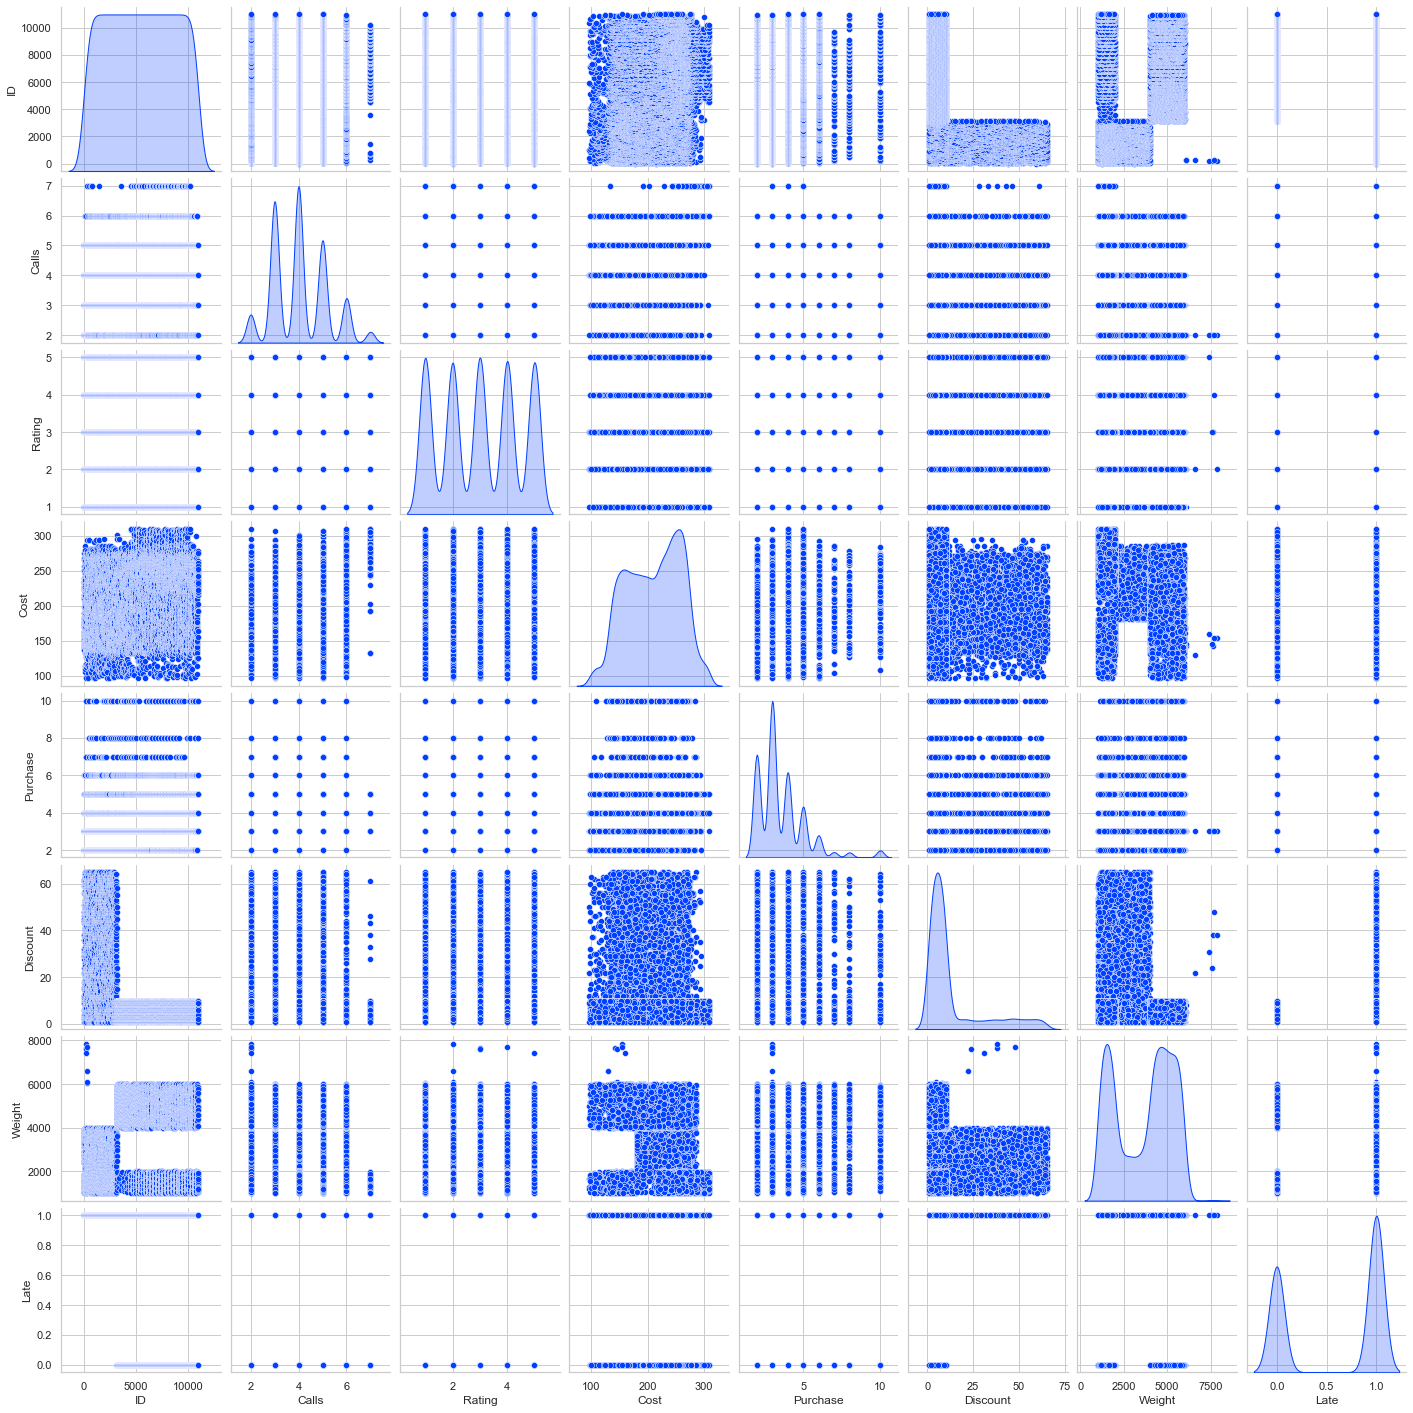

In [42]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, diag_kind='kde')

<Figure size 720x720 with 0 Axes>

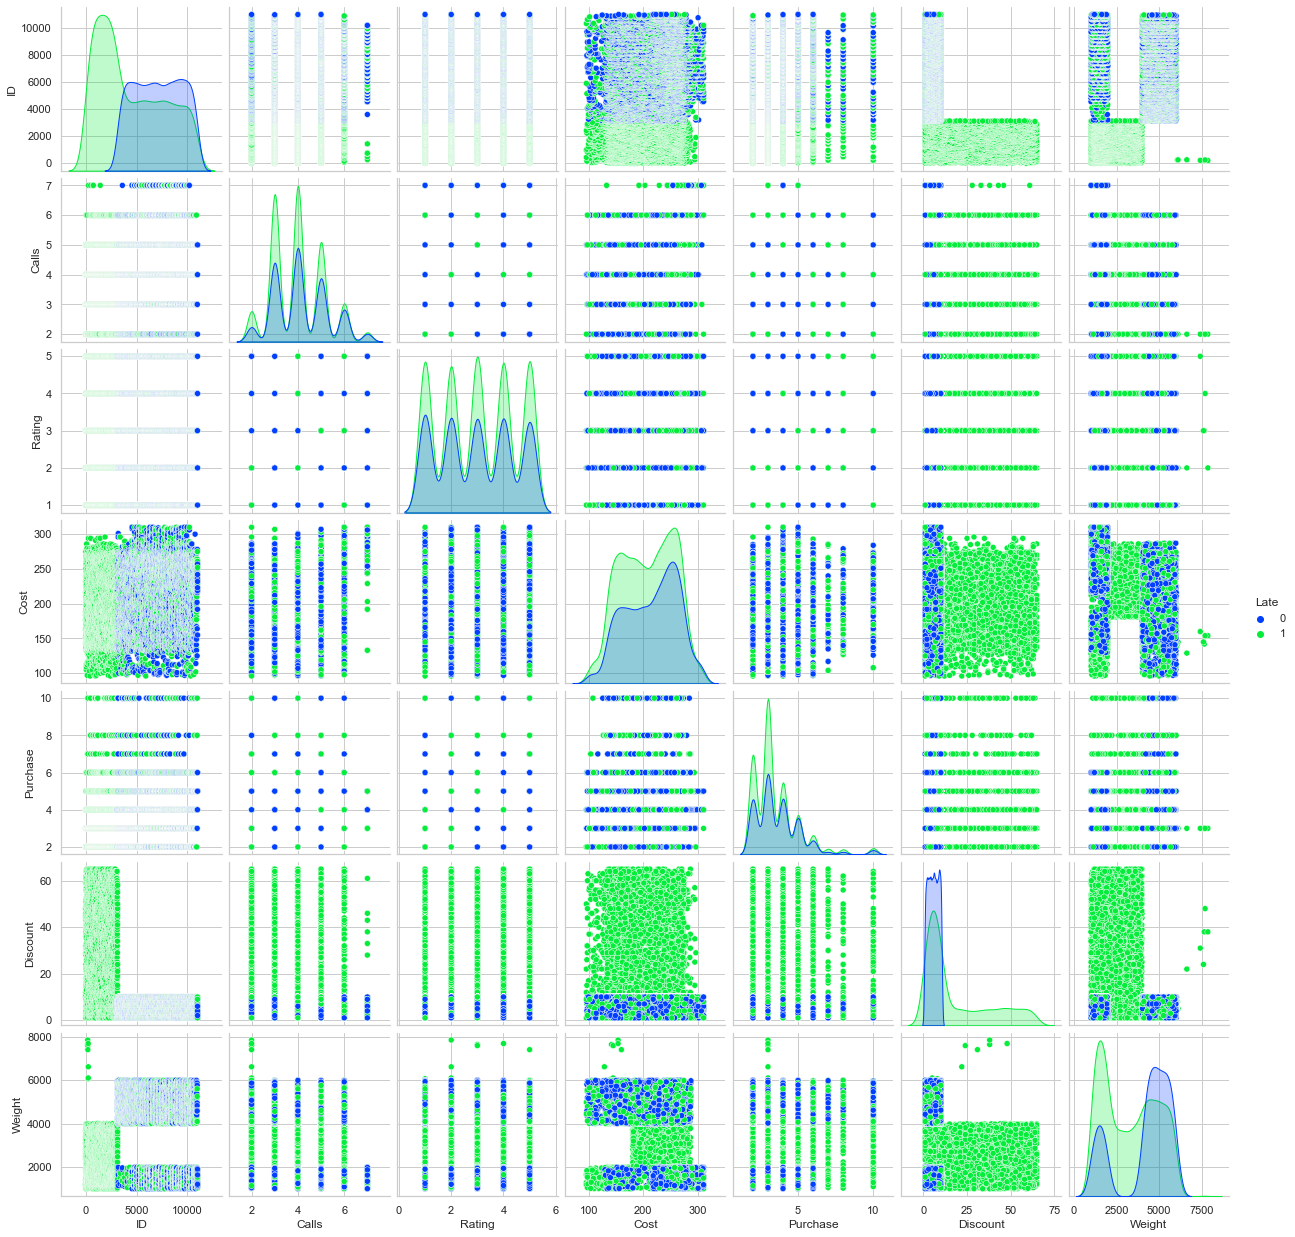

In [43]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, diag_kind='kde', hue='Late')

#### Catplot

<Figure size 864x576 with 0 Axes>

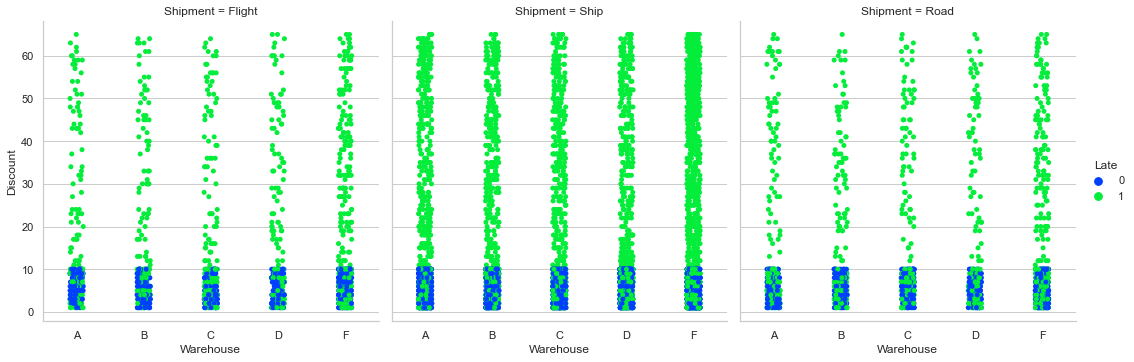

In [44]:
#Categorical Plot - Distribution of late deliveries or not from the Discount feature grouped by Warehouse and Delivery Type
plt.figure(figsize=(12, 8))
sns.catplot(x='Warehouse', y='Discount', hue='Late', col='Shipment', data=df, order=['A', 'B', 'C', 'D', 'F'])

<Figure size 864x576 with 0 Axes>

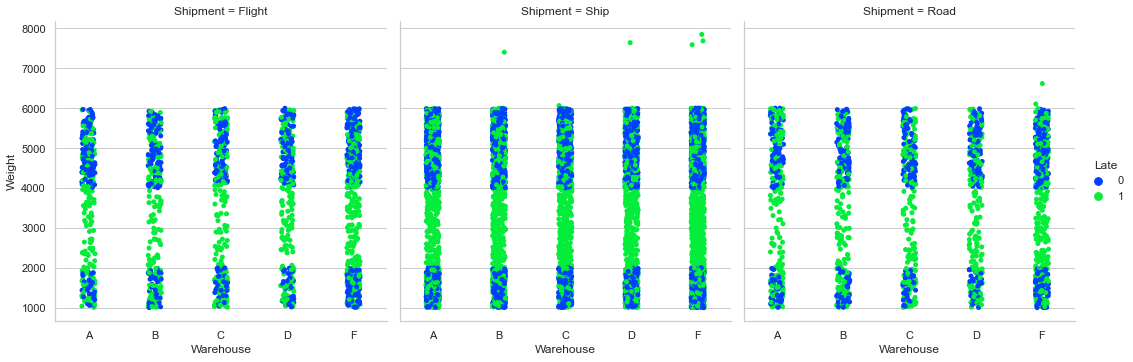

In [45]:
#Categorical Plot - Distribution of late shipments or not from the Weight feature grouped by Warehouse and Delivery Type
plt.figure(figsize=(12, 8))
sns.catplot(x='Warehouse', y='Weight', hue='Late', col='Shipment', data=df, order=['A', 'B', 'C', 'D', 'F'])

<Figure size 864x576 with 0 Axes>

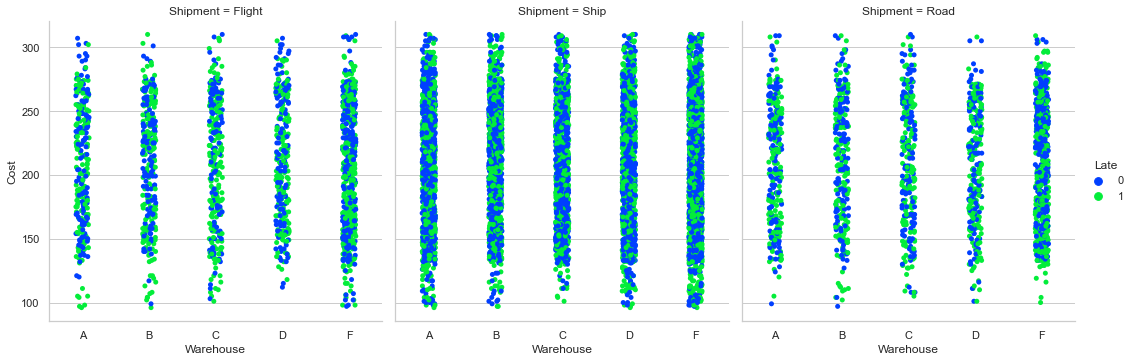

In [46]:
#Categorical Plot - Distribution of late shipments or not from the Cost feature grouped by Warehouse and Delivery Type
plt.figure(figsize=(12, 8))
sns.catplot(x='Warehouse', y='Cost', hue='Late', col='Shipment', data=df, order=['A', 'B', 'C', 'D', 'F'])

<Figure size 864x576 with 0 Axes>

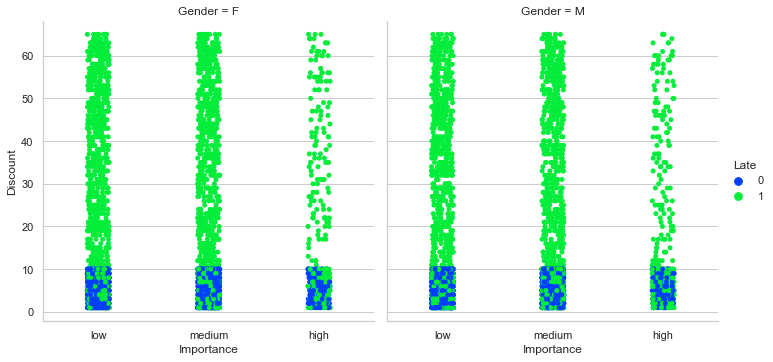

In [47]:
#Categorical Plot - The distribution of late deliveries or not from the Discount feature which is grouped against Product Importance and Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='Importance', y='Discount', hue='Late', col='Gender', data=df)

<Figure size 864x576 with 0 Axes>

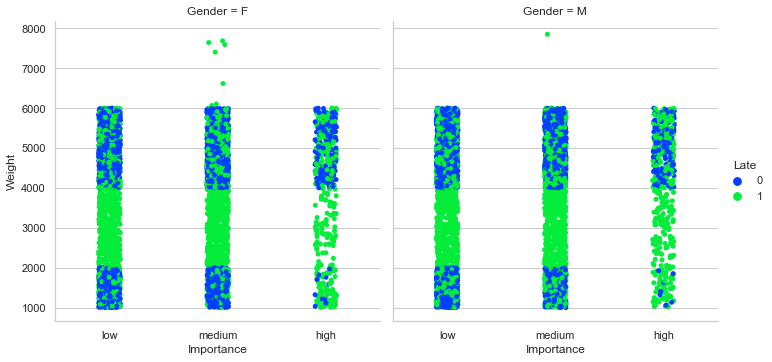

In [48]:
#Categorical Plot - The distribution of late deliveries or not from the Weight features grouped against Product Importance and Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='Importance', y='Weight', hue='Late', col='Gender', data=df)

<Figure size 864x576 with 0 Axes>

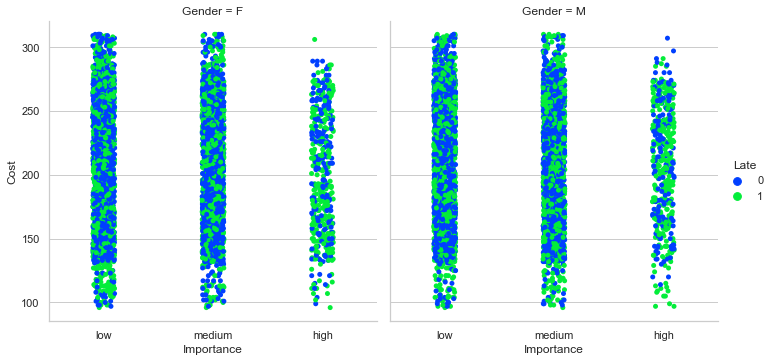

In [49]:
#Categorical Plot - Distribution of late deliveries or not from the Cost feature which is grouped against Product Importance and Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='Importance', y='Cost', hue='Late', col='Gender', data=df)

In [50]:
#Group by based on discount grouping
dfdiscount = df[['Discount','Late']]
discount_cat = []

for index, kolom in dfdiscount.iterrows():
    if kolom['Discount']>=0 and kolom['Discount']<=10:
        discount_cat.append('1 sd 10')
    elif kolom['Discount']>=11 and kolom['Discount']<=20:
        discount_cat.append('11 sd 20')
    elif kolom['Discount']>=21 and kolom['Discount']<=30:
        discount_cat.append('21 sd 30')    
    else:
        discount_cat.append('diatas 30')

        
dfdiscount['discount_cat'] = discount_cat
dfdiscount = dfdiscount.groupby(['discount_cat','Late'])['Discount'].count().reset_index()
dfdiscount.columns = ['discount_cat', 'Late', 'SubTotal']
dfdiscount['Total'] = dfdiscount.groupby('discount_cat')['SubTotal'].transform('sum')
dfdiscount['Late_Percentage'] = round((dfdiscount['SubTotal'] / dfdiscount['Total']) * 100, 2)
dfdiscount[dfdiscount['Late']==1]

,discount_cat,Late,SubTotal,Total,Late_Percentage
1,1 sd 10,1,3916,8352,46.89
2,11 sd 20,1,496,496,100.00
3,21 sd 30,1,441,441,100.00
4,diatas 30,1,1710,1710,100.00


In [51]:
#Group by based on weight grouping
dfweight = df[['Weight','Late']]
weight_cat = []

for index, kolom in dfweight.iterrows():
    if kolom['Weight']>=0 and kolom['Weight']<=2000:
        weight_cat.append('0 sd 2000')
    elif kolom['Weight']>=2001 and kolom['Weight']<=4000:
        weight_cat.append('2001 sd 4000')    
    else:
        weight_cat.append('4001 sd 6000')

        
dfweight['weight_cat'] = weight_cat
dfweight = dfweight.groupby(['weight_cat','Late'])['Weight'].count().reset_index()
dfweight.columns = ['weight_cat', 'Late', 'SubTotal']
dfweight['Total'] = dfweight.groupby('weight_cat')['SubTotal'].transform('sum')
dfweight['Late_Percentage'] = round((dfweight['SubTotal'] / dfweight['Total']) * 100, 2)
dfweight[dfweight['Late']==1]

,weight_cat,Late,SubTotal,Total,Late_Percentage
1,0 sd 2000,1,2199,3245,67.77
3,2001 sd 4000,1,1787,1788,99.94
5,4001 sd 6000,1,2577,5966,43.19


# Dataframe

4 Version of DataFrame for Modeling:
 - df = DataFrame with missing value & duplicate treatment, no outliers treatment
 - dfori = df DataFrame with feature encoding & normalization
 - df_project = df DataFrame with removed `Purchase` outliers and replaced `Discount` outliers with IQR Limit
 - dflimit = df DataFrame with all outliers replaced by IQR Limit

## df

In [52]:
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Missing Value

In [54]:
df.isna().sum()

ID            0
Warehouse     0
Shipment      0
Calls         0
Rating        0
Cost          0
Purchase      0
Importance    0
Gender        0
Discount      0
Weight        0
Late          0
dtype: int64

### Duplicate Value

In [55]:
df.duplicated().sum()

0

In [56]:
df.duplicated(subset=['ID','Warehouse','Shipment']).sum()

0

## dfori

In [57]:
dfori = df.copy()

### Feature Encoding dfori

In [58]:
dfori.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [59]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [60]:
#One Hot Encoding
FEwarehouse_ori = pd.get_dummies(dfori['Warehouse'], prefix = 'Warehouse')
FEshipment_ori = pd.get_dummies(dfori['Shipment'], prefix = 'Shipment')
FEGender_ori = pd.get_dummies(dfori['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_ori = pd.Categorical(dfori['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_ori, sort = True)

#Concat One Hot Encoding
dfori = pd.concat([dfori, FEwarehouse_ori], axis = 1)
dfori = pd.concat([dfori, FEshipment_ori], axis = 1)
dfori = pd.concat([dfori, FEGender_ori], axis = 1)
dfori['Importance'] = labels

In [61]:
dfori

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,...,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,1,D,Flight,4,2,177,3,0,F,44,...,0,0,0,1,0,1,0,0,1,0
1,2,F,Flight,4,5,216,2,0,M,59,...,0,0,0,0,1,1,0,0,0,1
2,3,A,Flight,2,2,183,4,0,M,48,...,1,0,0,0,0,1,0,0,0,1
3,4,B,Flight,3,3,176,4,1,M,10,...,0,1,0,0,0,1,0,0,0,1
4,5,C,Flight,2,2,184,3,1,F,46,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,1,F,1,...,1,0,0,0,0,0,0,1,1,0
10995,10996,B,Ship,4,1,232,5,1,F,6,...,0,1,0,0,0,0,0,1,1,0
10996,10997,C,Ship,5,4,242,5,0,F,4,...,0,0,1,0,0,0,0,1,1,0
10997,10998,F,Ship,5,2,223,6,1,M,2,...,0,0,0,0,1,0,0,1,0,1


In [62]:
#Drop Categorical Feature
dfori = dfori.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender'])

In [63]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Calls            10999 non-null  int64
 1   Rating           10999 non-null  int64
 2   Cost             10999 non-null  int64
 3   Purchase         10999 non-null  int64
 4   Importance       10999 non-null  int64
 5   Discount         10999 non-null  int64
 6   Weight           10999 non-null  int64
 7   Late             10999 non-null  int64
 8   Warehouse_A      10999 non-null  uint8
 9   Warehouse_B      10999 non-null  uint8
 10  Warehouse_C      10999 non-null  uint8
 11  Warehouse_D      10999 non-null  uint8
 12  Warehouse_F      10999 non-null  uint8
 13  Shipment_Flight  10999 non-null  uint8
 14  Shipment_Road    10999 non-null  uint8
 15  Shipment_Ship    10999 non-null  uint8
 16  Gender_F         10999 non-null  uint8
 17  Gender_M         10999 non-null  uint8
dtypes: int

### Feature Normalization dfori

In [64]:
ori_type = ['int64', 'uint8']
num_dfori = dfori.select_dtypes(include = ori_type)
nums_ori = num_dfori.columns
print(nums_ori)

Index(['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount',
       'Weight', 'Late', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship', 'Gender_F', 'Gender_M'],
      dtype='object')


In [65]:
for i in range(len(nums_ori)):
    dfori[nums_ori[i]] = MinMaxScaler().fit_transform(dfori[nums_ori[i]].values.reshape(len(dfori), 1))

In [66]:
dfori.head(10)

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.125,0.0,0.671875,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000,0.0,0.906250,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.250,0.0,0.734375,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.250,0.5,0.140625,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.125,0.5,0.703125,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.2,0.00,0.308411,0.125,0.5,0.171875,0.060774,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.2,0.75,0.719626,0.125,0.0,0.031250,0.200146,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.4,0.00,0.640187,0.000,0.0,0.734375,0.263404,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.2,0.75,0.252336,0.125,0.0,0.156250,0.125639,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.2,0.25,0.317757,0.125,0.5,0.437500,0.027173,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## df_project

In [67]:
df_project=df.copy()

### Remove Outliers

In [68]:
#Check outlier with Z-Score

print(f'Rows before treatment: {len(df_project)}')

filtered_entries = np.array([True] * len(df_project))
for col in ['Calls', 'Cost']:
    zscore = abs(st.zscore(df_project[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_project = df_project[filtered_entries]

print(f'Rows after treatment: {len(df_project)}')

Rows before treatment: 10999
Rows after treatment: 10999


In [69]:
#Remove outlier

print(f'Rows before treatment: {len(df_project)}')

filtered_entries = np.array([True] * len(df_project))
for col in ['Purchase']:
    Q1 = df_project[col].quantile(0.25)
    Q3 = df_project[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_project[col] >= low_limit) & (df_project[col] <= high_limit)) & filtered_entries
    
df_project = df_project[filtered_entries]

print(f'Rows after treatment: {len(df_project)}')

Rows before treatment: 10999
Rows after treatment: 9996


<AxesSubplot:xlabel='Discount', ylabel='Density'>

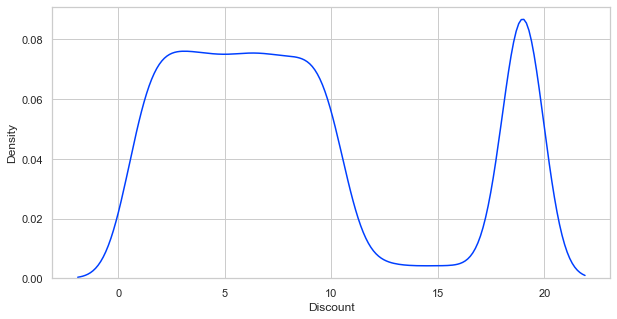

In [70]:
#Change outlier with max IQR

Q1_discount = df_project['Discount'].quantile(0.25)
Q3_discount = df_project['Discount'].quantile(0.75)
IQR_discount = Q3_discount - Q1_discount
low_limit_discount = Q1_discount - (IQR_discount * 1.5)
high_limit_discount = Q3_discount + (IQR_discount * 1.5)
df_project['Discount'].loc[df_project['Discount'] > high_limit_discount] = high_limit_discount

sns.kdeplot(x='Discount',data=df_project)

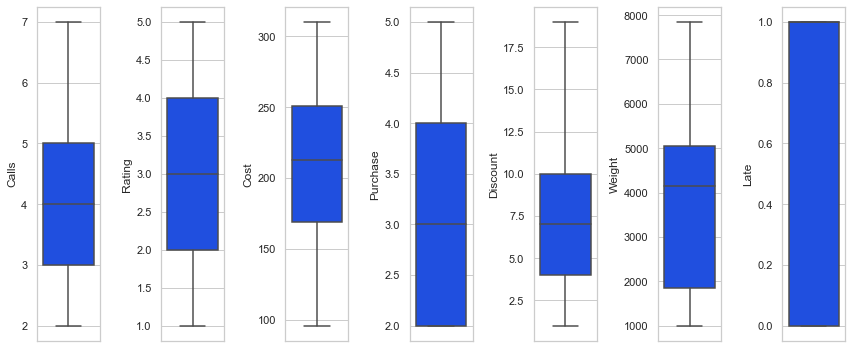

In [71]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_project[nums[i]], orient='v')
    plt.tight_layout()

### Feature Encoding df_project

In [72]:
#One Hot Encoding
FEwarehouse_project = pd.get_dummies(df_project['Warehouse'], prefix = 'Warehouse')
FEshipment_project = pd.get_dummies(df_project['Shipment'], prefix = 'Shipment')
FEGender_project = pd.get_dummies(df_project['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_project = pd.Categorical(df_project['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_project, sort = True)

#Concat One Hot Encoding
df_project = pd.concat([df_project, FEwarehouse_project], axis = 1)
df_project = pd.concat([df_project, FEshipment_project], axis = 1)
df_project = pd.concat([df_project, FEGender_project], axis = 1)
df_project['Importance'] = labels

In [73]:
df_project.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,...,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,1,D,Flight,4,2,177,3,0,F,19.0,...,0,0,0,1,0,1,0,0,1,0
1,2,F,Flight,4,5,216,2,0,M,19.0,...,0,0,0,0,1,1,0,0,0,1
2,3,A,Flight,2,2,183,4,0,M,19.0,...,1,0,0,0,0,1,0,0,0,1
3,4,B,Flight,3,3,176,4,1,M,10.0,...,0,1,0,0,0,1,0,0,0,1
4,5,C,Flight,2,2,184,3,1,F,19.0,...,0,0,1,0,0,1,0,0,1,0


In [74]:
#Drop Categorical Feature
df_project = df_project.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender'])

In [75]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            9996 non-null   int64  
 1   Rating           9996 non-null   int64  
 2   Cost             9996 non-null   int64  
 3   Purchase         9996 non-null   int64  
 4   Importance       9996 non-null   int64  
 5   Discount         9996 non-null   float64
 6   Weight           9996 non-null   int64  
 7   Late             9996 non-null   int64  
 8   Warehouse_A      9996 non-null   uint8  
 9   Warehouse_B      9996 non-null   uint8  
 10  Warehouse_C      9996 non-null   uint8  
 11  Warehouse_D      9996 non-null   uint8  
 12  Warehouse_F      9996 non-null   uint8  
 13  Shipment_Flight  9996 non-null   uint8  
 14  Shipment_Road    9996 non-null   uint8  
 15  Shipment_Ship    9996 non-null   uint8  
 16  Gender_F         9996 non-null   uint8  
 17  Gender_M     

### Feature Normalization df_project

In [76]:
project_type = ['int64', 'uint8']
num_df_project = df_project.select_dtypes(include = project_type)
nums_project = num_df_project.columns
print(nums_project)

Index(['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Weight', 'Late',
       'Warehouse_A', 'Warehouse_B', 'Warehouse_C', 'Warehouse_D',
       'Warehouse_F', 'Shipment_Flight', 'Shipment_Road', 'Shipment_Ship',
       'Gender_F', 'Gender_M'],
      dtype='object')


In [77]:
for i in range(len(nums_project)):
    df_project[nums_project[i]] = MinMaxScaler().fit_transform(df_project[nums_project[i]].values.reshape(len(df_project), 1))

In [78]:
df_project.head(10)

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.333333,0.0,19.0,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000000,0.0,19.0,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.666667,0.0,19.0,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.666667,0.5,10.0,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.333333,0.5,19.0,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.2,0.00,0.308411,0.333333,0.5,12.0,0.060774,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.2,0.75,0.719626,0.333333,0.0,3.0,0.200146,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.4,0.00,0.640187,0.000000,0.0,19.0,0.263404,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.2,0.75,0.252336,0.333333,0.0,11.0,0.125639,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.2,0.25,0.317757,0.333333,0.5,19.0,0.027173,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [79]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            9996 non-null   float64
 1   Rating           9996 non-null   float64
 2   Cost             9996 non-null   float64
 3   Purchase         9996 non-null   float64
 4   Importance       9996 non-null   float64
 5   Discount         9996 non-null   float64
 6   Weight           9996 non-null   float64
 7   Late             9996 non-null   float64
 8   Warehouse_A      9996 non-null   float64
 9   Warehouse_B      9996 non-null   float64
 10  Warehouse_C      9996 non-null   float64
 11  Warehouse_D      9996 non-null   float64
 12  Warehouse_F      9996 non-null   float64
 13  Shipment_Flight  9996 non-null   float64
 14  Shipment_Road    9996 non-null   float64
 15  Shipment_Ship    9996 non-null   float64
 16  Gender_F         9996 non-null   float64
 17  Gender_M     

In [80]:
df_project.head()

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.333333,0.0,19.0,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000000,0.0,19.0,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.666667,0.0,19.0,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.666667,0.5,10.0,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.333333,0.5,19.0,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## dflimit

In [81]:
dflimit = df.copy()

### Replace Outliers with Limit IQR

In [82]:
print('Rows before treatment:', len(dflimit))

for col in ['Purchase', 'Discount']:
    Q1 = dflimit[col].quantile(0.25)
    Q3 = dflimit[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    
    dflimit[col] = np.where(dflimit[col] > high_limit, high_limit, dflimit[col])
    dflimit[col] = np.where(dflimit[col] < low_limit, low_limit, dflimit[col])

print('Rows after treatment:', len(dflimit))

Rows before treatment: 10999
Rows after treatment: 10999


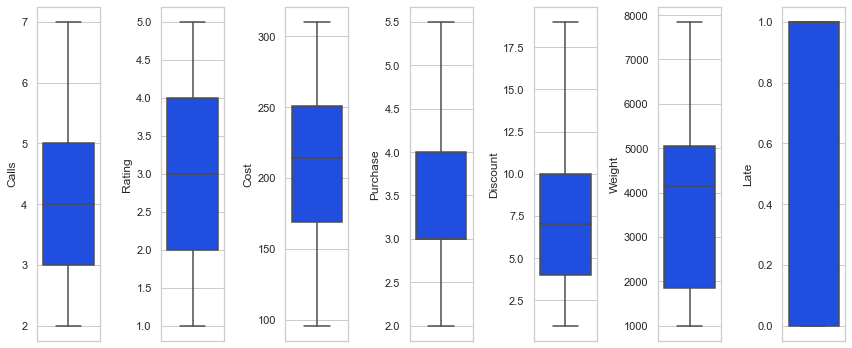

In [83]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=dflimit[nums[i]], orient='v')
    plt.tight_layout()

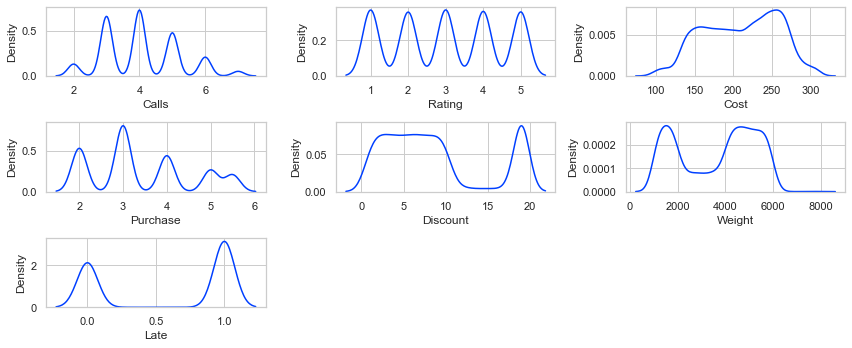

In [84]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.kdeplot(x = dflimit[nums[i]])
    plt.tight_layout()

### Feature Encoding dflimit

In [85]:
#One Hot Encoding
FEwarehouse_limit = pd.get_dummies(dflimit['Warehouse'], prefix = 'Warehouse')
FEshipment_limit = pd.get_dummies(dflimit['Shipment'], prefix = 'Shipment')
FEGender_limit = pd.get_dummies(dflimit['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_limit = pd.Categorical(dflimit['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_limit, sort = True)

#Concat One Hot Encoding
dflimit = pd.concat([dflimit, FEwarehouse_limit], axis = 1)
dflimit = pd.concat([dflimit, FEshipment_limit], axis = 1)
dflimit = pd.concat([dflimit, FEGender_limit], axis = 1)
dflimit['Importance'] = labels

In [86]:
dflimit

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,...,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,1,D,Flight,4,2,177,3.0,0,F,19.0,...,0,0,0,1,0,1,0,0,1,0
1,2,F,Flight,4,5,216,2.0,0,M,19.0,...,0,0,0,0,1,1,0,0,0,1
2,3,A,Flight,2,2,183,4.0,0,M,19.0,...,1,0,0,0,0,1,0,0,0,1
3,4,B,Flight,3,3,176,4.0,1,M,10.0,...,0,1,0,0,0,1,0,0,0,1
4,5,C,Flight,2,2,184,3.0,1,F,19.0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5.0,1,F,1.0,...,1,0,0,0,0,0,0,1,1,0
10995,10996,B,Ship,4,1,232,5.0,1,F,6.0,...,0,1,0,0,0,0,0,1,1,0
10996,10997,C,Ship,5,4,242,5.0,0,F,4.0,...,0,0,1,0,0,0,0,1,1,0
10997,10998,F,Ship,5,2,223,5.5,1,M,2.0,...,0,0,0,0,1,0,0,1,0,1


In [87]:
#Drop Categorical Feature
dflimit = dflimit.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender'])

In [88]:
dflimit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10999 non-null  int64  
 1   Rating           10999 non-null  int64  
 2   Cost             10999 non-null  int64  
 3   Purchase         10999 non-null  float64
 4   Importance       10999 non-null  int64  
 5   Discount         10999 non-null  float64
 6   Weight           10999 non-null  int64  
 7   Late             10999 non-null  int64  
 8   Warehouse_A      10999 non-null  uint8  
 9   Warehouse_B      10999 non-null  uint8  
 10  Warehouse_C      10999 non-null  uint8  
 11  Warehouse_D      10999 non-null  uint8  
 12  Warehouse_F      10999 non-null  uint8  
 13  Shipment_Flight  10999 non-null  uint8  
 14  Shipment_Road    10999 non-null  uint8  
 15  Shipment_Ship    10999 non-null  uint8  
 16  Gender_F         10999 non-null  uint8  
 17  Gender_M    

### Feature Normalization dflimit

In [89]:
limit_type = ['int64', 'uint8', 'float64']
num_dflimit = dflimit.select_dtypes(include = limit_type)
nums_limit = num_dflimit.columns
print(nums_limit)

Index(['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount',
       'Weight', 'Late', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship', 'Gender_F', 'Gender_M'],
      dtype='object')


In [90]:
for i in range(len(nums_limit)):
    dflimit[nums_limit[i]] = MinMaxScaler().fit_transform(dflimit[nums_limit[i]].values.reshape(len(dflimit), 1))

In [91]:
dflimit.head(10)

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.285714,0.0,1.000000,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000000,0.0,1.000000,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.571429,0.0,1.000000,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.571429,0.5,0.500000,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.285714,0.5,1.000000,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.2,0.00,0.308411,0.285714,0.5,0.611111,0.060774,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.2,0.75,0.719626,0.285714,0.0,0.111111,0.200146,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.4,0.00,0.640187,0.000000,0.0,1.000000,0.263404,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.2,0.75,0.252336,0.285714,0.0,0.555556,0.125639,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.2,0.25,0.317757,0.285714,0.5,1.000000,0.027173,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [92]:
dflimit.describe()

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.410892,0.497636,0.533630,0.406180,0.302300,0.421720,0.384663,0.596691,0.166652,0.166652,0.166652,0.166742,0.333303,0.161560,0.160015,0.678425,0.504137,0.495863
std,0.228298,0.353401,0.224595,0.324829,0.320732,0.338637,0.238916,0.490584,0.372681,0.372681,0.372681,0.372763,0.471415,0.368064,0.366636,0.467102,0.500006,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.341121,0.285714,0.000000,0.166667,0.122498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.500000,0.551402,0.285714,0.500000,0.333333,0.459898,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.600000,0.750000,0.724299,0.571429,0.500000,0.500000,0.591527,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling

In [93]:
#Import Metrics Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

#Model Evaluation function
def model_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy : %.3f' % accuracy_score(ytest, pred))
    print('Precision : %.3f' % precision_score(ytest, pred))
    print('Recall : %.3f' % recall_score(ytest, pred))
    print('F-1Score : %.3f' % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print('ROC AUC : %.3f' % auc(fpr, tpr))
    
    # Average precision score
    average_precision = average_precision_score(ytest, pred)
    print('AP : %.3f'% average_precision)

In [94]:
#Feature Importance Function
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()

#Best Hyperparameter Function
def best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## Model Logistic Regression (Best Model) <br> dataset : df_project

In [95]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            9996 non-null   float64
 1   Rating           9996 non-null   float64
 2   Cost             9996 non-null   float64
 3   Purchase         9996 non-null   float64
 4   Importance       9996 non-null   float64
 5   Discount         9996 non-null   float64
 6   Weight           9996 non-null   float64
 7   Late             9996 non-null   float64
 8   Warehouse_A      9996 non-null   float64
 9   Warehouse_B      9996 non-null   float64
 10  Warehouse_C      9996 non-null   float64
 11  Warehouse_D      9996 non-null   float64
 12  Warehouse_F      9996 non-null   float64
 13  Shipment_Flight  9996 non-null   float64
 14  Shipment_Road    9996 non-null   float64
 15  Shipment_Ship    9996 non-null   float64
 16  Gender_F         9996 non-null   float64
 17  Gender_M     

In [96]:
#Splitting Feature & Target
xlr4 = df_project.drop(columns = ['Late']) #feature
ylr4 = df_project['Late'] #target

In [97]:
#Splitting data Train & data Test
from sklearn.model_selection import train_test_split
xlrtrain4, xlrtest4, ylrtrain4, ylrtest4 = train_test_split(xlr4, ylr4, test_size = 0.3, random_state = 33)

In [98]:
from sklearn.linear_model import LogisticRegression
modelLR4 = LogisticRegression(random_state=33)
modelLR4.fit(xlrtrain4, ylrtrain4)

LogisticRegression(random_state=33)

In [99]:
y_pred_trainLR4 = modelLR4.predict(xlrtrain4)
y_pred_trainLR4

array([0., 1., 1., ..., 0., 1., 1.])

In [100]:
y_predLR4 = modelLR4.predict(xlrtest4)
y_predLR4

array([0., 1., 1., ..., 1., 0., 1.])

In [101]:
modelLR4.predict_proba(xlrtest4)

array([[0.75159415, 0.24840585],
       [0.05339265, 0.94660735],
       [0.37325046, 0.62674954],
       ...,
       [0.06035651, 0.93964349],
       [0.64658431, 0.35341569],
       [0.40606176, 0.59393824]])

In [102]:
model_evaluation(modelLR4, y_predLR4, xlrtrain4, ylrtrain4, xlrtest4, ylrtest4)

Accuracy : 0.644
Precision : 0.700
Recall : 0.719
F-1Score : 0.710
ROC AUC : 0.623
AP : 0.674


In [103]:
print('AP test score : ',average_precision_score(ylrtest4, y_predLR4))
print('AP train score : ',average_precision_score(ylrtrain4, y_pred_trainLR4))

AP test score :  0.6736635875708062
AP train score :  0.6671226322752545


<AxesSubplot:>

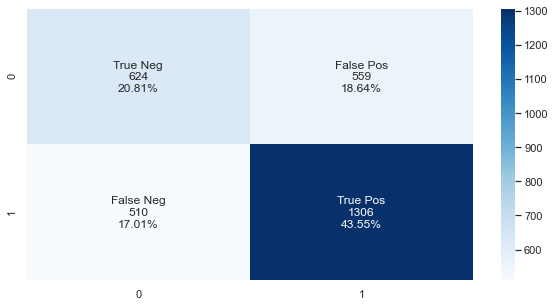

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(ylrtest4, y_predLR4)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

AP : 0.674


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.67')

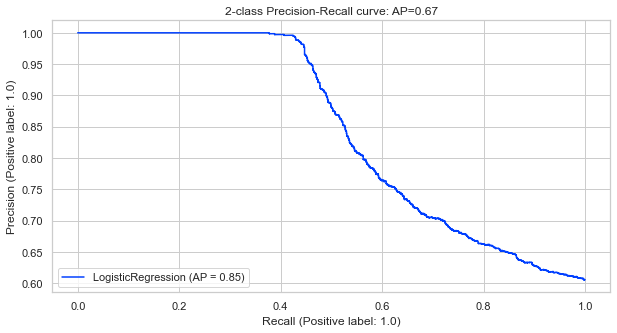

In [105]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

average_precision = average_precision_score(ylrtest4, y_predLR4)
print('AP : %.3f'% average_precision)

disp = plot_precision_recall_curve(modelLR4, xlrtest4, ylrtest4)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [106]:
print('train Accuracy : ',modelLR4.score(xlrtrain4, ylrtrain4))
print('test Accuracy : ',modelLR4.score(xlrtest4, ylrtest4))

train Accuracy :  0.6417035872516793
test Accuracy :  0.6435478492830944


In [107]:
print(modelLR4.intercept_)

[0.90636848]


In [108]:
print(modelLR4.coef_)

[[-0.6642232   0.09884154 -0.28235059 -0.83606839  0.14183813  0.14437288
  -2.31368325 -0.06977003  0.0220196   0.03156602  0.05425796 -0.03430753
   0.01037528 -0.03250334  0.02589408 -0.04067465  0.04444066]]


In [109]:
koef2={'Feature':['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount',
       'Weight','Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship', 'Gender_F', 'Gender_M'],
     'Coefficient':[-0.71546752,0.09661052,-0.31429438,-2.20297555 ,0.1440757,8.03198014,
  -2.40729906,-0.0680354,0.02322063 ,0.03060397,0.05114368,-0.0352052,
   0.01004352,-0.03501893,0.02670308,-0.04108585,0.04281352] }
koef_table=pd.DataFrame.from_dict(koef2).sort_values(by=['Coefficient'],ascending=False).reset_index(drop=True)
koef_table

,Feature,Coefficient
0,Discount,8.031980
1,Importance,0.144076
2,Rating,0.096611
3,Warehouse_D,0.051144
4,Gender_M,0.042814
5,Warehouse_C,0.030604
6,Shipment_Ship,0.026703
7,Warehouse_B,0.023221
8,Shipment_Flight,0.010044
9,Shipment_Road,-0.035019


## Model XGBoost <br> dataset : dflimit

In [110]:
#Splitting Feature & Target
xl4 = dflimit.drop(columns = ['Late'])
yl4 = dflimit['Late']

In [111]:
from sklearn.model_selection import train_test_split
#Splitting data Train & data Test
xltrain4, xltest4, yltrain4, yltest4 = train_test_split(xl4, yl4, test_size = 0.3, random_state = 3)

In [112]:
#Import XGBoost
from xgboost import XGBClassifier, XGBRegressor

#Evaluation Metrics
XGl4 = XGBClassifier(random_state = 3)
XGl4.fit(xltrain4, yltrain4)
predictionl4 = XGl4.predict(xltest4)
model_evaluation(XGl4, predictionl4, xltrain4, yltrain4, xltest4, yltest4)

[16:42:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.664
Precision : 0.729
Recall : 0.681
F-1Score : 0.705
ROC AUC : 0.660
AP : 0.684


In [113]:
predictionl4_train = XGl4.predict(xltrain4)
predictionl4_train

array([0., 1., 1., ..., 1., 1., 1.])

In [114]:
print('AP train: ',average_precision_score(yltrain4, predictionl4_train))
print('AP test: ',average_precision_score(yltest4, predictionl4))

AP train:  0.9305343344382166
AP test:  0.6841662966257959


In [115]:
print('train Accuracy : ',XGl4.score(xltrain4, yltrain4))
print('test Accuracy : ',XGl4.score(xltest4, yltest4))

train Accuracy :  0.9238862189894792
test Accuracy :  0.6639393939393939


## Model AdaBoost <br> dataset : dflimit

In [116]:
#Splitting Feature & Target
xl5 = dflimit.drop(columns = ['Late'])
yl5 = dflimit['Late']

In [117]:
from sklearn.model_selection import train_test_split
#Splitting data Train & data Test
xltrain5, xltest5, yltrain5, yltest5 = train_test_split(xl5, yl5, test_size = 0.3, random_state = 3)

In [118]:
#Import AdaBoost
from sklearn.ensemble import AdaBoostClassifier

#Evaluation Metrics
ABl5 = AdaBoostClassifier(random_state = 3)
ABl5.fit(xltrain5, yltrain5)
predictionl5 = ABl5.predict(xltest5)
model_evaluation(ABl5, predictionl5, xltrain5, yltrain5, xltest5, yltest5)

Accuracy : 0.667
Precision : 0.783
Recall : 0.601
F-1Score : 0.680
ROC AUC : 0.682
AP : 0.705


In [119]:
predictionl5_train = ABl5.predict(xltrain5)
predictionl5_train

array([0., 0., 0., ..., 0., 1., 0.])

In [120]:
print('AP train: ',average_precision_score(yltrain5, predictionl5_train))
print('AP test: ',average_precision_score(yltest5, predictionl5))

AP train:  0.7291951734218447
AP test:  0.7050101215849885


In [121]:
print('train Accuracy : ',ABl5.score(xltrain5, yltrain5))
print('test Accuracy : ',ABl5.score(xltest5, yltest5))

train Accuracy :  0.6848941420963761
test Accuracy :  0.6672727272727272


## Model Random Forest <br> dataset : dfori

In [122]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10999 non-null  float64
 1   Rating           10999 non-null  float64
 2   Cost             10999 non-null  float64
 3   Purchase         10999 non-null  float64
 4   Importance       10999 non-null  float64
 5   Discount         10999 non-null  float64
 6   Weight           10999 non-null  float64
 7   Late             10999 non-null  float64
 8   Warehouse_A      10999 non-null  float64
 9   Warehouse_B      10999 non-null  float64
 10  Warehouse_C      10999 non-null  float64
 11  Warehouse_D      10999 non-null  float64
 12  Warehouse_F      10999 non-null  float64
 13  Shipment_Flight  10999 non-null  float64
 14  Shipment_Road    10999 non-null  float64
 15  Shipment_Ship    10999 non-null  float64
 16  Gender_F         10999 non-null  float64
 17  Gender_M    

In [123]:
#Splitting Feature & Target
xr1 = dfori.drop(columns = ['Late'])
yr1 = dfori['Late']

In [124]:
from sklearn.model_selection import train_test_split
#Splitting data Train & data Test
xrtrain1, xrtest1, yrtrain1, yrtest1 = train_test_split(xr1, yr1, test_size = 0.3, random_state = 10)

In [125]:
#Import RandomForest
from sklearn.ensemble import RandomForestClassifier

#Evaluation Metrics
RFr1 = RandomForestClassifier(random_state = 10)
RFr1.fit(xrtrain1, yrtrain1)
predictionr1 = RFr1.predict(xrtest1)
model_evaluation(RFr1, predictionr1, xrtrain1, yrtrain1, xrtest1, yrtest1)

Accuracy : 0.661
Precision : 0.756
Recall : 0.642
F-1Score : 0.694
ROC AUC : 0.666
AP : 0.700


In [126]:
print('train Accuracy : ', RFr1.score(xrtrain1, yrtrain1))
print('test Accuracy : ', RFr1.score(xrtest1, yrtest1))

train Accuracy :  1.0
test Accuracy :  0.6609090909090909


In [127]:
from sklearn.metrics import plot_confusion_matrix

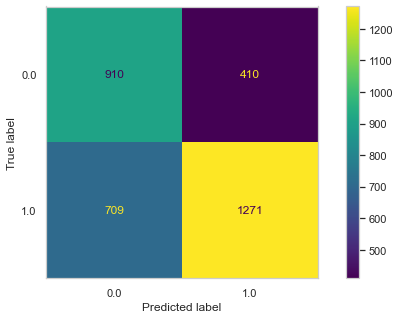

In [128]:
plot_confusion_matrix(RFr1, xrtest1, yrtest1)
plt.grid(False)
plt.show() 

### Tuning Hyperparameter Random Forest

In [129]:
from sklearn.model_selection import validation_curve

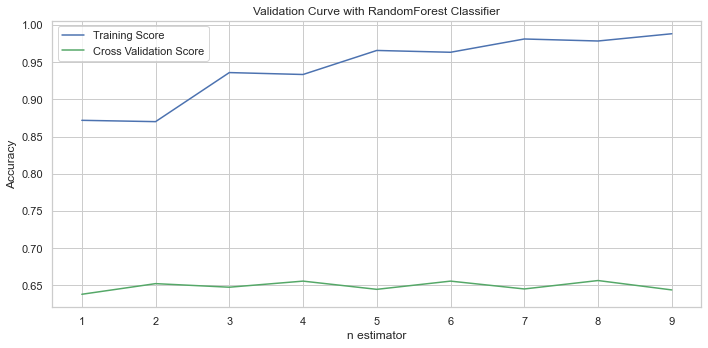

In [130]:
parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(
                                RandomForestClassifier(random_state = 10),
                                X = xrtrain1, y = yrtrain1, 
                                param_name = 'n_estimators', 
                                param_range = parameter_range,
                                cv = 5,
                                scoring = 'accuracy')

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("n estimator")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [131]:
#Import RandomForest
from sklearn.ensemble import RandomForestClassifier

#Evaluation Metrics
RFHr1 = RandomForestClassifier(random_state = 10, n_estimators = 8, max_depth = 4, min_samples_split = 5, min_samples_leaf = 2)
RFHr1.fit(xrtrain1, yrtrain1)
predictionr1 = RFHr1.predict(xrtest1)
model_evaluation(RFHr1, predictionr1, xrtrain1, yrtrain1, xrtest1, yrtest1)

Accuracy : 0.679
Precision : 0.844
Recall : 0.570
F-1Score : 0.681
ROC AUC : 0.706
AP : 0.739


In [132]:
predictionr1_train = RFHr1.predict(xrtrain1)
predictionr1_train

array([1., 0., 0., ..., 1., 0., 1.])

In [133]:
print('AP train: ',average_precision_score(yrtrain1, predictionr1_train))
print('AP train: ',average_precision_score(yrtest1, predictionr1))

AP train:  0.7414611484184332
AP train:  0.7390133774214491


In [134]:
print('train Accuracy : ', RFHr1.score(xrtrain1, yrtrain1))
print('test Accuracy : ', RFHr1.score(xrtest1, yrtest1))

train Accuracy :  0.6889206390440317
test Accuracy :  0.6787878787878788


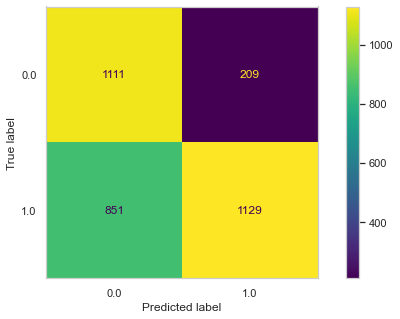

In [135]:
plot_confusion_matrix(RFHr1, xrtest1, yrtest1)
plt.grid(False)
plt.show() 

# Benefit Analysis

In [136]:
#On Time Rate Growth Calculation 
Total = df['ID'].count()
Late =  df[df['Late']==1]['ID'].count()
OnTime =  df[df['Late']==0]['ID'].count()
PredRate = 0.73
PredLate = round(Late*PredRate)
PredOnTime = Late-PredLate

print('----- Existing -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print()
print('----- After Modeling -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('  Predicted Late : \t', round(PredLate), ',', round(PredLate/Late*100,1),'%')
print('  Predicted On Time : \t', round(PredOnTime), ',', round(PredOnTime/Late*100,1),'%')
print('Late After Pred : \t', Late-PredLate, ',', round((Late-PredLate)/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print('On Time After Pred : \t', OnTime+PredLate, ',', round((OnTime+PredLate)/Total*100,1),'%')
print('On Time Growth rate : \t', round(((OnTime+PredLate)/(OnTime)-1)*100,1), '%')

----- Existing -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
On Time : 		 4436 , 40.3 %

----- After Modeling -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
  Predicted Late : 	 4791 , 73.0 %
  Predicted On Time : 	 1772 , 27.0 %
Late After Pred : 	 1772 , 16.1 %
On Time : 		 4436 , 40.3 %
On Time After Pred : 	 9227 , 83.9 %
On Time Growth rate : 	 108.0 %


In [137]:
#Potential Revenue Loss Saved Calculation
TotalCost = df['Cost'].sum()
TotalDiscount = df['Discount'].sum()
TotalRevenue = TotalCost - TotalDiscount
AvgRevenue = round(TotalRevenue / Total, 2)

print('Total Cost : \t\t', '{:,}'.format(TotalCost))
print('Total Discount : \t', '{:,}'.format(TotalDiscount))
print('Total Revenue : \t', '{:,}'.format(TotalRevenue))
print('Average Revenue : \t', '{:,}'.format(AvgRevenue))
print()
print('Potential Revenue')
print('Late : \t\t\t', '{:,.2f}'.format(AvgRevenue * Late))
print('Predicted Late : \t', '{:,.2f}'.format(AvgRevenue * PredLate))
print()
print('*Nominal in Dollar $')

Total Cost : 		 2,311,955
Total Discount : 	 147,092
Total Revenue : 	 2,164,863
Average Revenue : 	 196.82

Potential Revenue
Late : 			 1,291,729.66
Predicted Late : 	 942,964.62

*Nominal in Dollar $


In [138]:
# Filtering customers late & give 5 rating
df[(df['Late']==1) & (df['Rating']==5)]

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1
12,13,D,Flight,3,5,198,3,medium,F,1,3667,1
17,18,F,Ship,5,5,227,3,medium,M,36,3952,1
18,19,D,Ship,5,5,239,3,high,M,18,2495,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10900,10901,C,Ship,5,5,196,4,medium,M,8,4604,1
10903,10904,F,Ship,3,5,241,4,low,F,9,5526,1
10910,10911,A,Ship,5,5,264,8,high,F,10,5759,1
10963,10964,F,Flight,4,5,220,10,medium,M,8,4100,1


In [139]:
#20% from late customer give 5 rating
late5percent=(1317/6563)*100
late5percent

20.06704251104678

In [140]:
#Rating Growth Calculation 
TotalRating = df['Rating'].sum()
AvgRating = round(TotalRating / Total, 2)
print('Total Rating : \t\t\t', '{:,}'.format(TotalRating))
print('Average Rating : \t\t', AvgRating)
print()
print('Predicted Late Rating : \t', '{:,}'.format(TotalRating), '+' , '{:,}'.format(PredLate-round(PredLate*0.2)), '=', '{:,}'.format(TotalRating + PredLate-round(PredLate*0.2)) )
print('Predicted Late Estimated Rating goes up by 1 (except Rating = 5)')
print()
print('Avg Rating after Prediction : \t', round(((TotalRating + PredLate-round(PredLate*0.2))/Total), 2))
print('On Time Growth rate : \t\t', round((((TotalRating + PredLate-round(PredLate*0.2))/Total)/((TotalRating)/Total)-1)*100,1), '%')

Total Rating : 			 32,893
Average Rating : 		 2.99

Predicted Late Rating : 	 32,893 + 3,833 = 36,726
Predicted Late Estimated Rating goes up by 1 (except Rating = 5)

Avg Rating after Prediction : 	 3.34
On Time Growth rate : 		 11.7 %
